## Задача 1. Линейная регрессия, метод градиентного спуска
#### Пелогейко Макар, 471

In [551]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('display.precision', 4)
%precision %.4f

### Самостоятельно реализовать функцию **gradient_descent(X, y)**, которая по заданной обучающей выборке обучает модель линейной регрессии, оптимизируя функционал методом градиентного спуска (Batch Gradient Descent, GD) и возвращая вектор весов **w**. В качестве функционала можно выбрать, например, функцию ошибок **MSE** + $L_2$-регуляризатор. Использовать матрично-векторные операции для вычисления градиента.

In [552]:
def gradient_descent(x, y, alpha=1, acepted_delta=1):
    m, n = x.shape
    
    free_col = np.ones((x.shape[0], 1))
    x_long = np.concatenate((free_col,x), axis=1)
    
    n_new = n + 1
    
    W = np.ones(n_new,)
    
    old_cost = 0
    Q = 0
    k = 1
    
    while True:
        y_predicted = x_long.dot(W)

        loss = y_predicted - y
        RL2 = np.sum(np.square(W[1:]))
        Q = np.sum(loss ** 2) / n + 2.0 * alpha * RL2

        gradient = (2.0 / n) * x_long.T.dot(loss) + alpha * W
        lambd = 1 / k
        k += 1

        W = W - lambd * gradient    

        if abs(Q - old_cost) < acepted_delta:
            break
            
        old_cost = Q
        
    print(k)
    return W

In [553]:
df = pd.read_csv("cars.csv")

df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [554]:
df = df.drop(columns=["car_ID",  "CarName"])
df.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

### Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи регрессии.

In [514]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [515]:
df.isnull().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

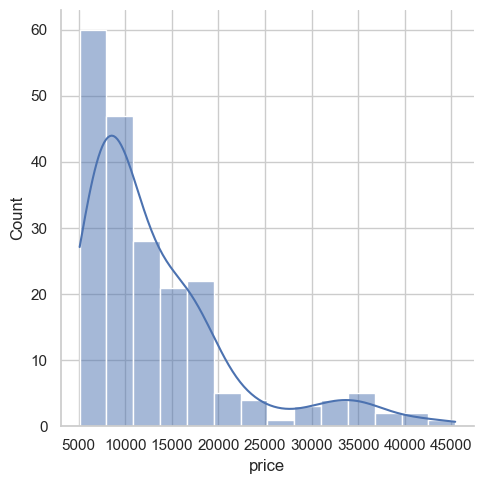

In [516]:

sns.set(style='whitegrid')
ax = sns.displot(x='price', data=df, kde = True, color = 'b')

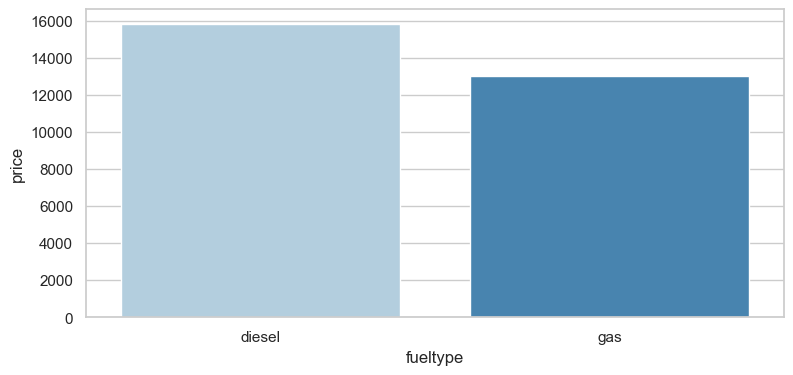

In [517]:

price = df['price'].groupby(df['fueltype']).mean().sort_values(ascending = False)
f, ax = plt.subplots(1, 1, figsize=(9, 4))
ax = sns.barplot(x=price.index, y=price, palette='Blues')

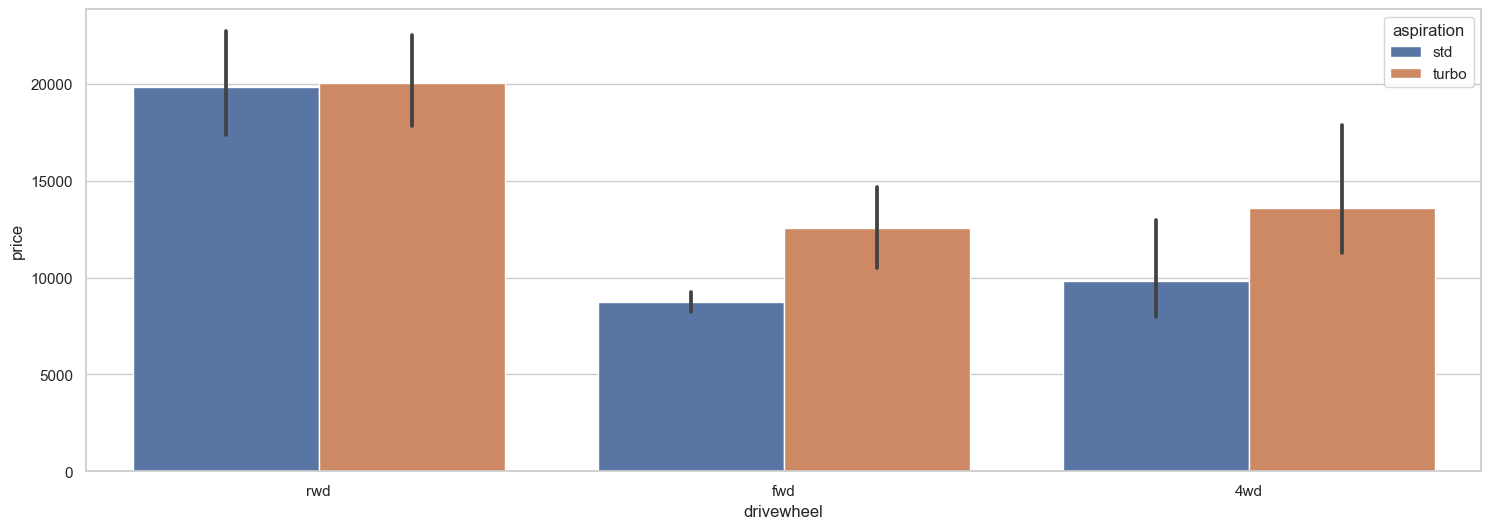

In [518]:
f, ax = plt.subplots(1, 1, figsize=(18, 6))
ax = sns.barplot(x='drivewheel', y='price', hue='aspiration', data=df)

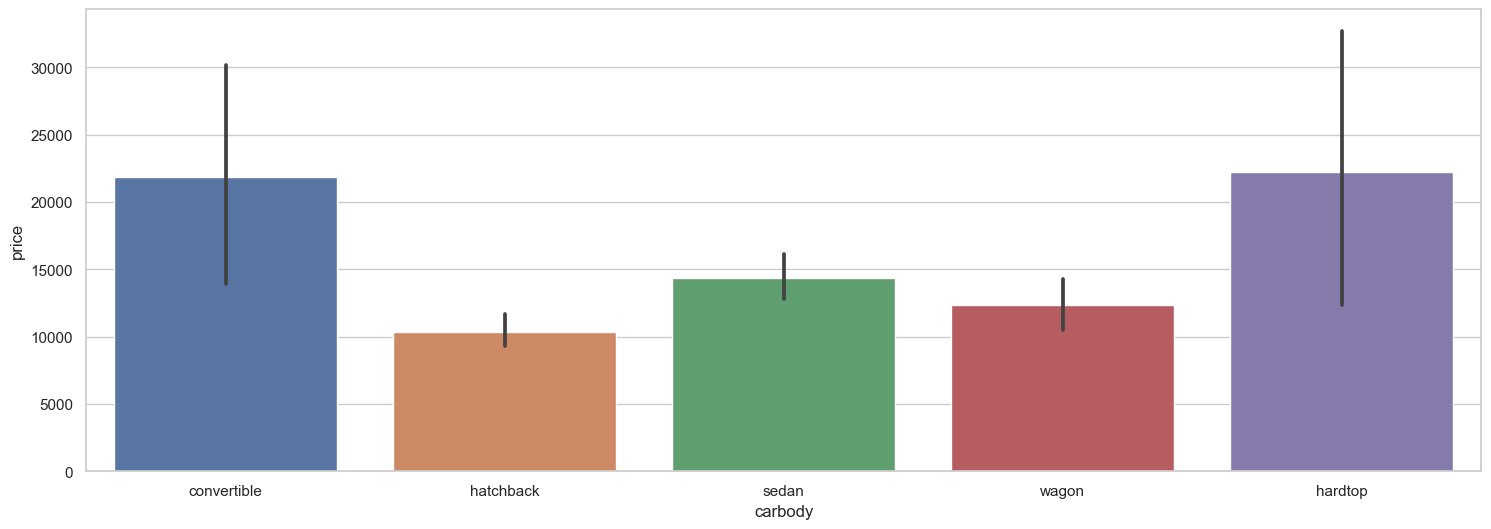

In [522]:
f, ax = plt.subplots(1, 1, figsize=(18, 6))
ax = sns.barplot(x='carbody', y='price', data=df)

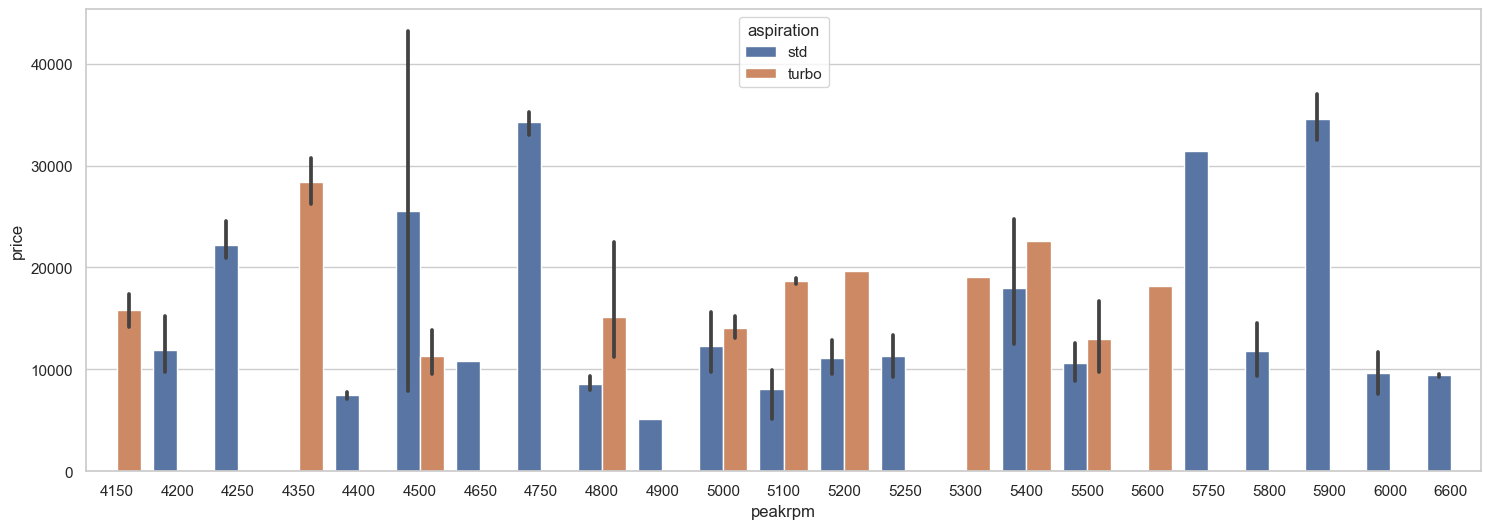

In [523]:
f, ax = plt.subplots(1, 1, figsize=(18, 6))
ax = sns.barplot(x='peakrpm', y='price', hue='aspiration', data=df)

### При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).

In [524]:
df.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [525]:
df.aspiration.unique()

array(['std', 'turbo'], dtype=object)

In [526]:
df.doornumber.unique()

array(['two', 'four'], dtype=object)

In [527]:
df.carbody.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [528]:
df.drivewheel.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [529]:
df.enginelocation.unique()

array(['front', 'rear'], dtype=object)

In [530]:
df.enginetype.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [531]:
df.fuelsystem.unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [532]:
df.symboling.unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [533]:
df['fueltype'].replace(['gas', 'diesel'], [1, 2], inplace=True)
df['aspiration'].replace(['std', 'turbo'], [1, 2], inplace=True)
df['doornumber'].replace(['two', 'four'], [2, 4], inplace=True)
df['carbody'].replace(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'], [1, 2, 3, 4, 5], inplace=True)
df['drivewheel'].replace(['rwd', 'fwd', '4wd'], [1, 2, 3], inplace=True)
df['enginelocation'].replace(['front', 'rear'], [1, 2], inplace=True)
df['enginetype'].replace(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], [1, 2, 3, 4, 5, 6, 7], inplace=True)
df['fuelsystem'].replace(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'], [1, 2, 3, 4, 5, 6, 7, 8], inplace=True)
df['cylindernumber'].replace(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'], [1, 6, 5, 3, 12, 2, 8], inplace=True)

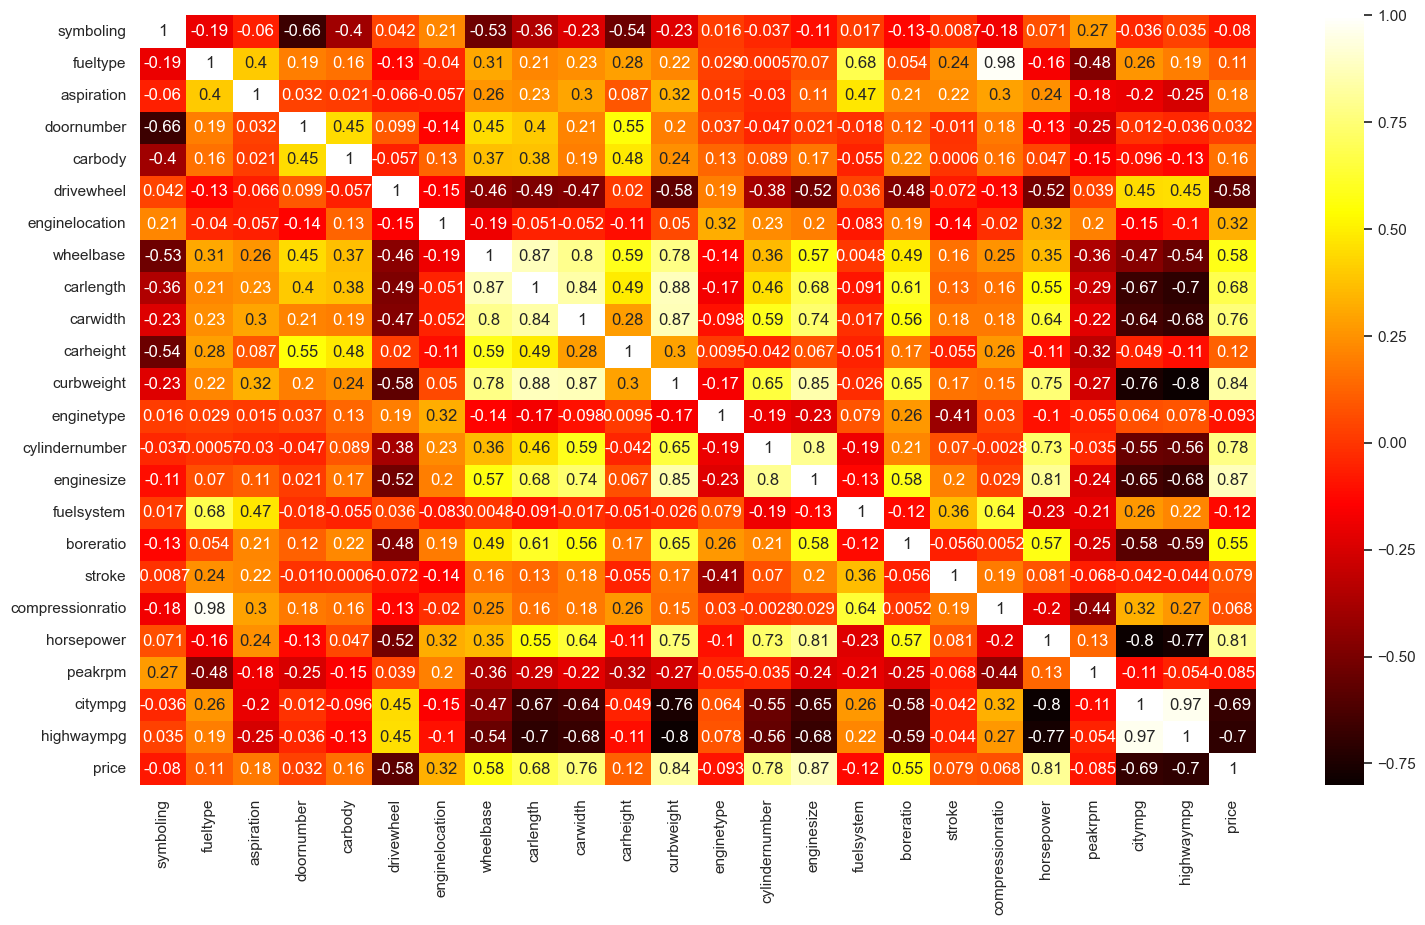

In [534]:
f, ax = plt.subplots(1, 1, figsize=(18, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap='hot')

In [535]:
df = df.drop(columns=["wheelbase",  "carlength", "carheight", "carwidth", "enginesize", "boreratio"])

### Случайным образом разбить данные на обучающую и тестовую выборки, используя методы существующих библиотек.

In [536]:

x = df.drop(['price'], axis=1)
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [538]:
# Масштабирование данных
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### * (+1 балл) Перед обучением моделей подобрать наилучшее количество (и само подмножество) признаков, например используя Recursive Feature Elimination (RFE).

In [539]:

rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=2, scoring='accuracy')
label = LabelEncoder()

y_transformed = lab.fit_transform(y_train)
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x.columns)
rfecv.fit(x_train_scaled_df, y_transformed)

optimal_features = rfecv.n_features_
selected_features = list(x_train_scaled_df.columns[rfecv.support_])
print(f"Best number of features: {optimal_features}\n"
f"Best features: {selected_features}")

Best number of features: 8
Best features: ['symboling', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'stroke', 'peakrpm', 'citympg']


### * (+1 балл) Во все ваши реализации добавить возможность настройки нужных гиперпараметров, а в процессе обучения всех моделей осуществить подбор оптимальных значений этих гиперпараметров.

Text(0, 0.5, 'CV score')

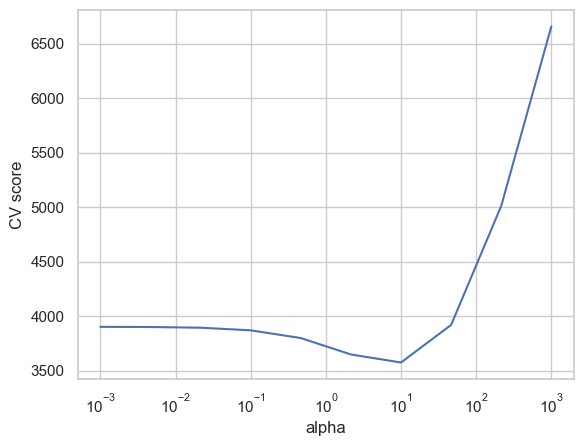

In [540]:

alpha_grid = np.logspace(-3, 3, 10)
searcher = GridSearchCV(Ridge(), [{"alpha": alpha_grid}], scoring="neg_root_mean_squared_error", cv=2)
searcher.fit(x_train_scaled, y_train)

plt.plot(alpha_grid, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

In [541]:
best_alpha = searcher.best_params_["alpha"]
best_alpha

10.0000

In [542]:

df_best = df[['symboling', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'stroke', 'peakrpm', 'citympg', 'price']]
x = df_best.drop(['price'], axis=1)
y = df_best['price']

x_train_best, x_test_best, y_train_best, y_test_best = train_test_split(x, y, test_size=0.3, random_state=42)

# Масштабирование данных
scaler = StandardScaler()

x_train_scaled_best = scaler.fit_transform(x_train_best)
x_test_scaled_best = scaler.transform(x_test_best)

### Обучить модель на обучающей выборке, используя функцию **gradient_descent(X, y)**. Оценить качество модели на обучающей и тестовой выборках, используя **MSE**, **RMSE** и $R^2$.


In [543]:
w = gradient_descent(x_train_scaled_best, y_train_best, alpha=best_alpha, acepted_delta=0.001)

343


In [544]:
def get_ln_model(x, w):
    free_col = np.ones((x.shape[0], 1))
    x_long = np.concatenate((free_col,x), axis=1)
    result = np.matmul(x_long, w)
    return result

In [545]:
w

array([10477.6831,   126.9768,   131.5922,   -12.3605,   936.0149,
       -2101.9741,    45.7534,  -676.574 , -3558.2373])

In [546]:

y_train_best_model = get_ln_model(x_train_scaled_best, w)
y_test_best_model = get_ln_model(x_test_scaled_best, w)

print('--------- MSE ----------')
print(f"train = {mean_squared_error(y_train_best, y_train_best_model, squared=True)}")
print(f"test = {mean_squared_error(y_test_best, y_test_best_model, squared=True)}\n")

print('--------- RMSE ----------')
print(f"train = {mean_squared_error(y_train_best, y_train_best_model, squared=False)}")
print(f"test = {mean_squared_error(y_test_best, y_test_best_model, squared=False)}\n")

print('--------- R^2 ----------')
print(f"train = {r2_score(y_train_best, y_train_best_model)}")
print(f"test = {r2_score(y_test_best, y_test_best_model)}")

--------- MSE ----------
train = 31903584.326884802
test = 46861330.761313885

--------- RMSE ----------
train = 5648.325798578266
test = 6845.533635978563

--------- R^2 ----------
train = 0.47655808504710206
test = 0.3236378574710015


### Обучить модель, используя существующую библиотеку. Например, в **sklearn** для $L_2$-регуляризатора можно использовать **Ridge**. Сравнить качество с вашей реализацией.

In [547]:
ridge = Ridge(alpha=best_alpha, tol=0.001)
_ = ridge.fit(x_train_scaled_best, y_train_best)

In [548]:
y_train_ridge = ridge.predict(x_train_scaled_best)
y_test_ridge = ridge.predict(x_test_scaled_best)

print('------------------------ MSE ------------------------')
print(f"train = {mean_squared_error(y_train_best, y_train_best_model, squared=True):15.6f}"
     f"  |  train Ridge = {mean_squared_error(y_train_best, y_train_ridge, squared=True):15.6f}")

print(f"test  = {mean_squared_error(y_test_best, y_test_best_model, squared=True):15.6f}"
     f"  |  test  Ridge = {mean_squared_error(y_test_best, y_test_ridge, squared=True):15.6f}\n")

print('------------------------ RMSE ------------------------')
print(f"train = {mean_squared_error(y_train_best, y_train_best_model, squared=False):15.6f}"
     f"  |  train Ridge = {mean_squared_error(y_train_best, y_train_ridge, squared=False):15.6f}")

print(f"test  = {mean_squared_error(y_test_best, y_test_best_model, squared=False):15.6f}"
     f"  |  test  Ridge = {mean_squared_error(y_test_best, y_test_ridge, squared=False):15.6f}\n")

print('------------------------ R^2 ------------------------')
print(f"train = {r2_score(y_train_best, y_train_best_model):15.6f}"
     f"  |  train Ridge = {r2_score(y_train_best, y_train_ridge):15.6f}")

print(f"test  = {r2_score(y_test_best, y_test_best_model):15.6f}"
     f"  |  test  Ridge = {r2_score(y_test_best, y_test_ridge):15.6f}\n")

------------------------ MSE ------------------------
train = 31903584.326885  |  train Ridge = 22297833.068240
test  = 46861330.761314  |  test  Ridge = 37292685.385492

------------------------ RMSE ------------------------
train =     5648.325799  |  train Ridge =     4722.058139
test  =     6845.533636  |  test  Ridge =     6106.773730

------------------------ R^2 ------------------------
train =        0.476558  |  train Ridge =        0.634160
test  =        0.323638  |  test  Ridge =        0.461745



### Повторить тоже самое, но используя кросс-валидацию.

In [549]:

results_df = pd.DataFrame(index=['MSE train', 'MSE test',
                                    'RMSE train', 'RMSE test',
                                    'R2 train', 'R2 test'])
kfold = KFold(n_splits=5)

x_fold_df = x_train_scaled_df[['symboling', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'stroke', 'peakrpm', 'citympg']]

for fold, (train, test) in enumerate(kfold.split(X=x_fold_df , y=y_train_best)):
    w = gradient_descent(x_fold_df.iloc[train, :], y_train_best.iloc[train],
                            alpha=best_alpha, acepted_delta=0.001)

    y_fold_train = linear_model(x_fold_df.iloc[train, :], w)
    y_fold_test = linear_model(x_fold_df.iloc[test, :], w)

    results_df.insert(fold, f'Fold {fold + 1}',
                         [mean_squared_error(y_train_best.iloc[train], y_fold_train, squared=True),
                          mean_squared_error(y_train_best.iloc[test], y_fold_test, squared=True),
                          mean_squared_error(y_train_best.iloc[train], y_fold_train, squared=False),
                          mean_squared_error(y_train_best.iloc[test], y_fold_test, squared=False),
                          r2_score(y_train_best.iloc[train], y_fold_train),
                          r2_score(y_train_best.iloc[test], y_fold_test)])

mean = results_df.mean(axis=1)
std = results_df.std(axis=1)
results_df["MEAN"] = mean
results_df["STD"] = std

results_df

245
204
168
169
218


,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,MEAN,STD
MSE train,3.8648e+07,3.6553e+07,3.5186e+07,3.3425e+07,3.3550e+07,3.5473e+07,2.1921e+06
MSE test,2.2016e+07,2.6978e+07,4.1282e+07,5.4756e+07,5.8301e+07,4.0667e+07,1.6164e+07
RMSE train,6.2167e+03,6.0459e+03,5.9318e+03,5.7815e+03,5.7922e+03,5.9536e+03,1.8298e+02
RMSE test,4.6922e+03,5.1940e+03,6.4251e+03,7.3997e+03,7.6355e+03,6.2693e+03,1.3050e+03
R2 train,4.1112e-01,4.5685e-01,4.2037e-01,4.1343e-01,3.7619e-01,4.1559e-01,2.8732e-02
R2 test,4.6707e-01,2.0243e-01,3.3023e-01,2.5619e-01,3.4258e-01,3.1970e-01,1.0017e-01


In [555]:
ridge_results_df = pd.DataFrame(index=['MSE',
                                    'RMSE',
                                    'R2'])

mse = cross_val_score(ridge, x_fold_df, y_train_best, cv=5, scoring="neg_mean_squared_error")

rmse = cross_val_score(ridge, x_fold_df, y_train_best, cv=5, scoring="neg_root_mean_squared_error")

r2 = cross_val_score(ridge, x_fold_df, y_train_best, cv=5, scoring="r2")

for fold in range(5):
    ridge_results_df.insert(fold, f"Fold {fold + 1}", [-mse[fold], -rmse[fold], r2[fold]])

mean = ridge_results_df.mean(axis=1)
std = ridge_results_df.std(axis=1)
ridge_results_df["MEAN"] = mean
ridge_results_df["STD"] = std

ridge_results_df

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,MEAN,STD
MSE,1.3486e+07,2.1861e+07,2.6150e+07,3.5244e+07,3.3602e+07,2.6069e+07,8.9017e+06
RMSE,3.6724e+03,4.6755e+03,5.1137e+03,5.9367e+03,5.7967e+03,5.0390e+03,9.1996e+02
R2,6.7355e-01,3.5372e-01,5.7573e-01,5.2123e-01,6.2110e-01,5.4906e-01,1.2281e-01


### Вывод
 Созданая функция градиента показывает близкое значение коэффицента детерминизации $R^2$ и тот же порядок ошибок с различием менее чем в 2 раза.
